# <font color=blue>_Scraping Kellogg Faculty Pages_.</font>

## Task - Extract data from Kellogg Faculty Index
From the Kellogg Faculty Directory, we will extract each faculty member's name, website, position using both _Beautiful Soup_ and _Selenium_ Libraries in python.

## <font color=blue>Step 1: Inspect the Webpage</font>

First let's take a closer look at the webpage we are scraping.

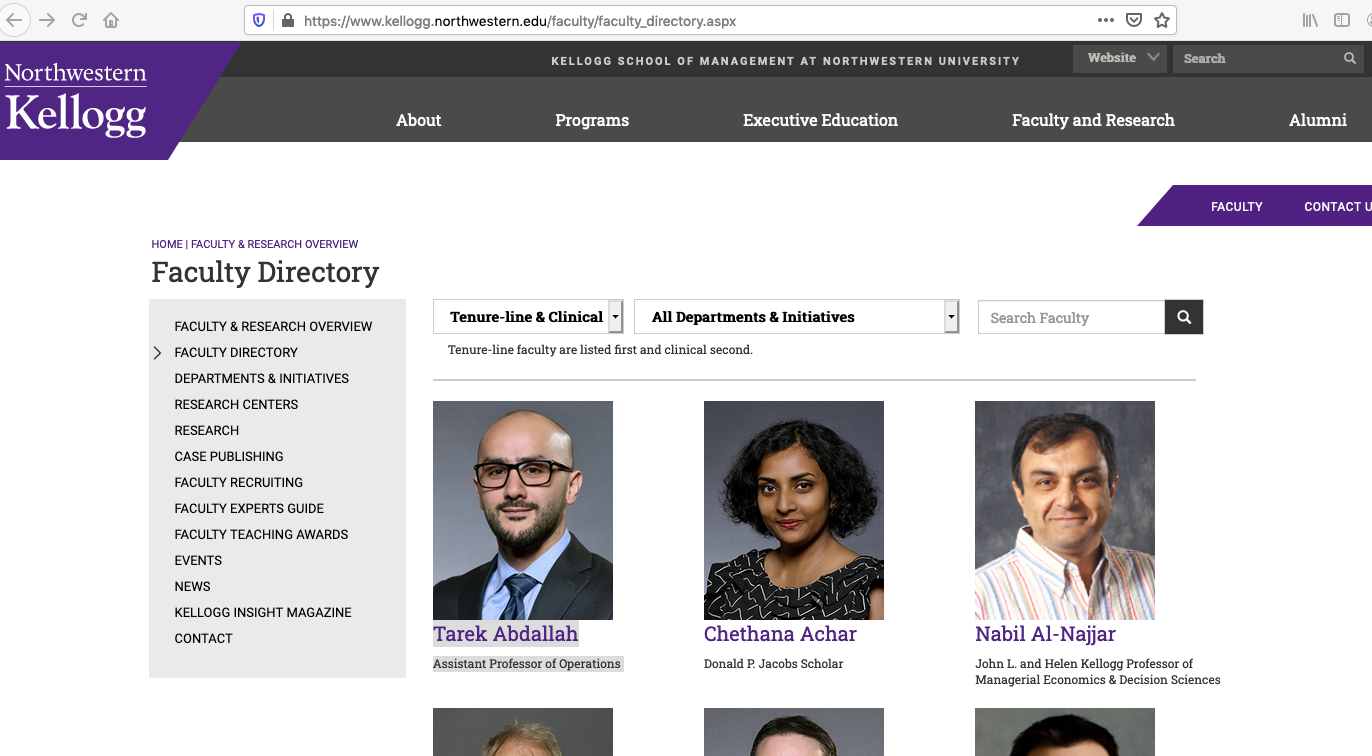

In [1]:
from IPython.display import Image
Image(filename= "image1.png", width=5000, height=5000)

In a Chrome Browser, we can highlight the element we want (a professor's name), right click, and select __Inspect Element__ or __Inspect__.

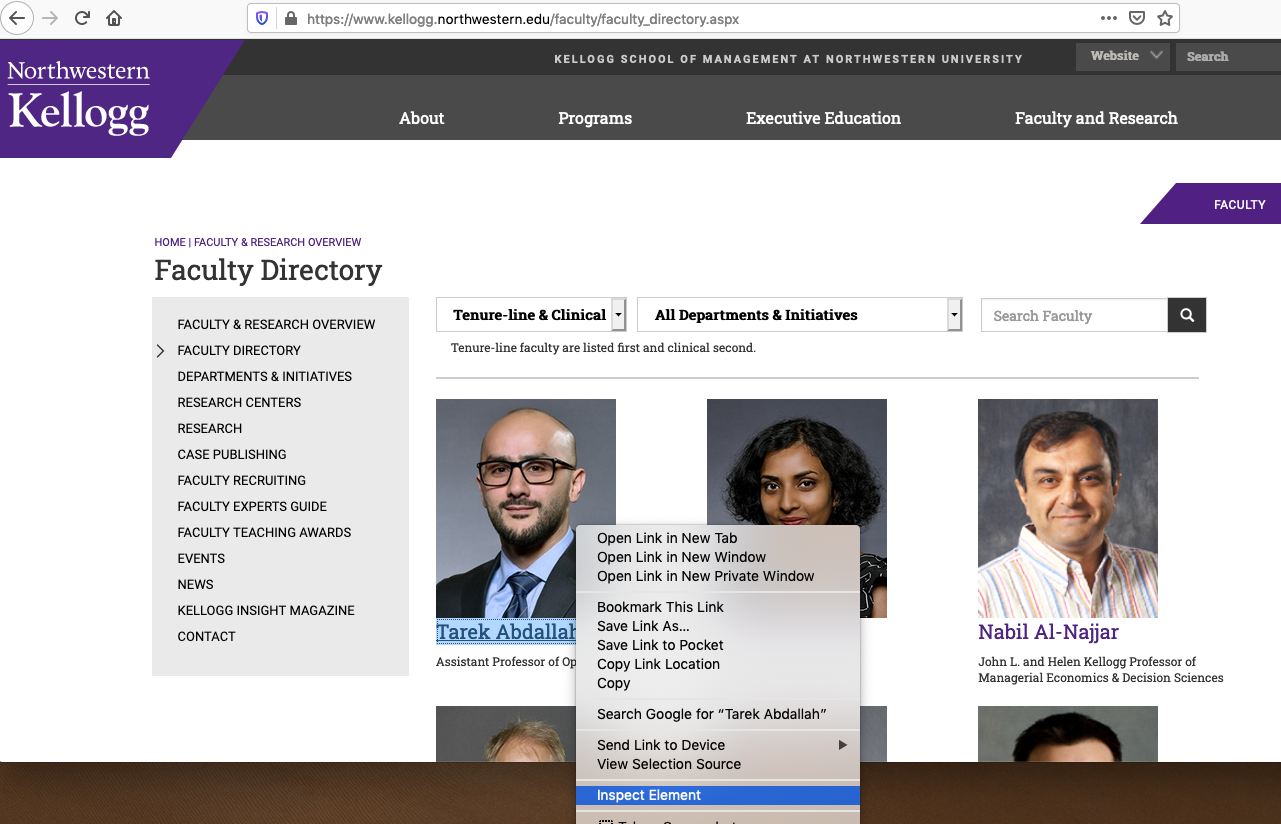

In [2]:
from IPython.display import Image
Image(filename= "image2.png", width=5000, height=5000)

This will take you to Chrome's Developer Tools where you can inspect the html __tags__ and __attributes__ of the element you highlighted.

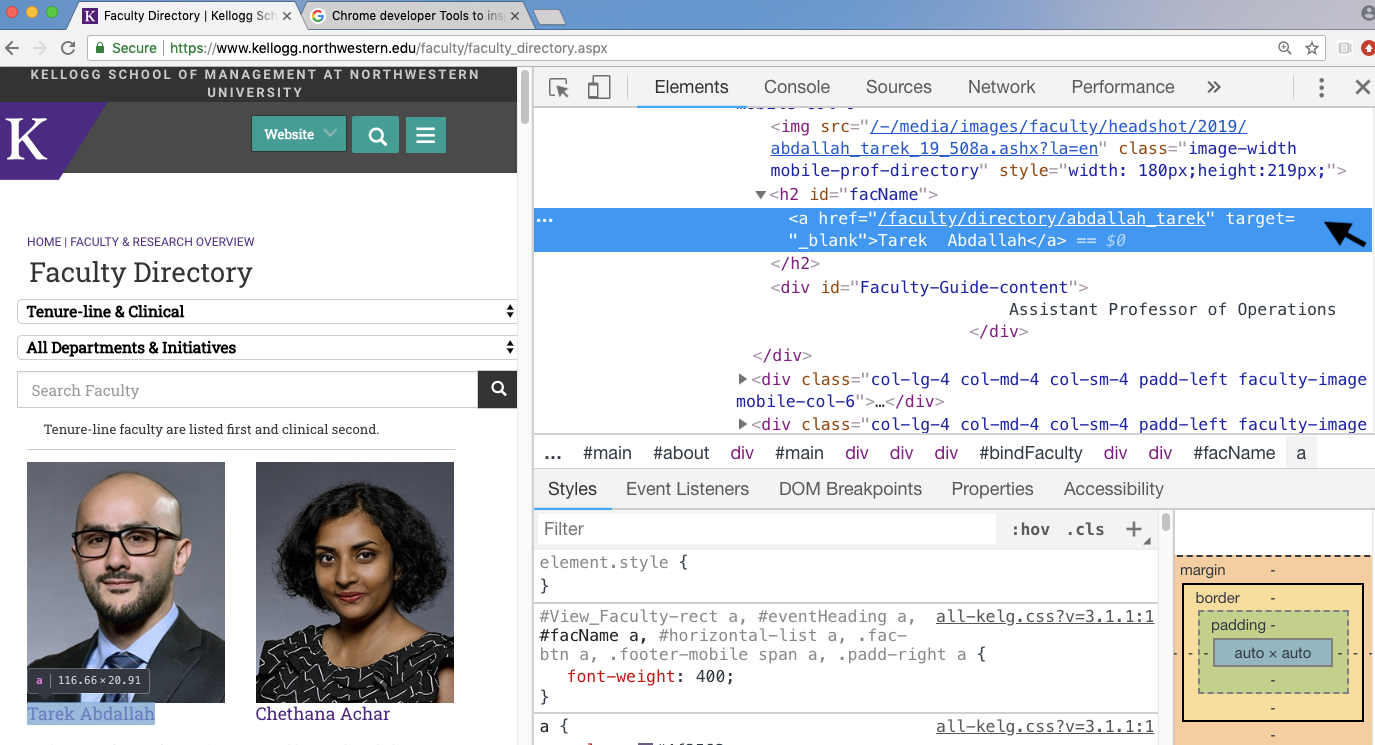

In [3]:
from IPython.display import Image
Image(filename= "image3.png", width=5000, height=5000)

In the Developer Tools, you can see that Professor Abdallah's webpage ("/faculty/directory/abdallah_tarek") can be found within the __href__ attribute of the __&lt;a>__ tag. 

The __&lt;a>__ tag is actually a 'child' tag to the 'parent' __&lt;h2>__ tag with an __id__ attribute and a "facName" value.

Note that if you use your mouse to hover over an html tag, it will highlight that element on the webpage. 

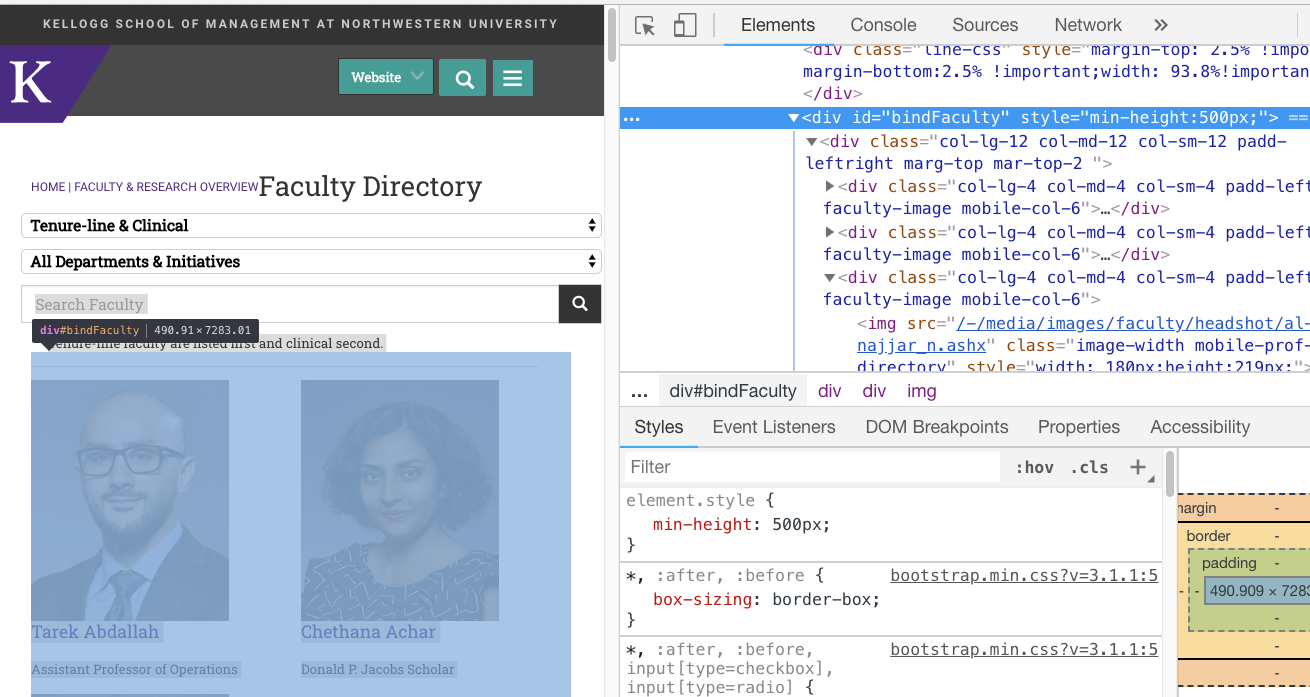

In [4]:
from IPython.display import Image
Image(filename= "image4.png", width=5000, height=5000)

To see the HTML table that contains information for all faculty members, we can follow the same steps. The table falls under the __id__ attribute of the __&lt;div>__ tag. (Shown above) 

For more information on understanding the HTML code, see: https://www.tutorialrepublic.com/html-tutorial/


If you further inspect this page, you will notice that there are only 36 faculty members.  

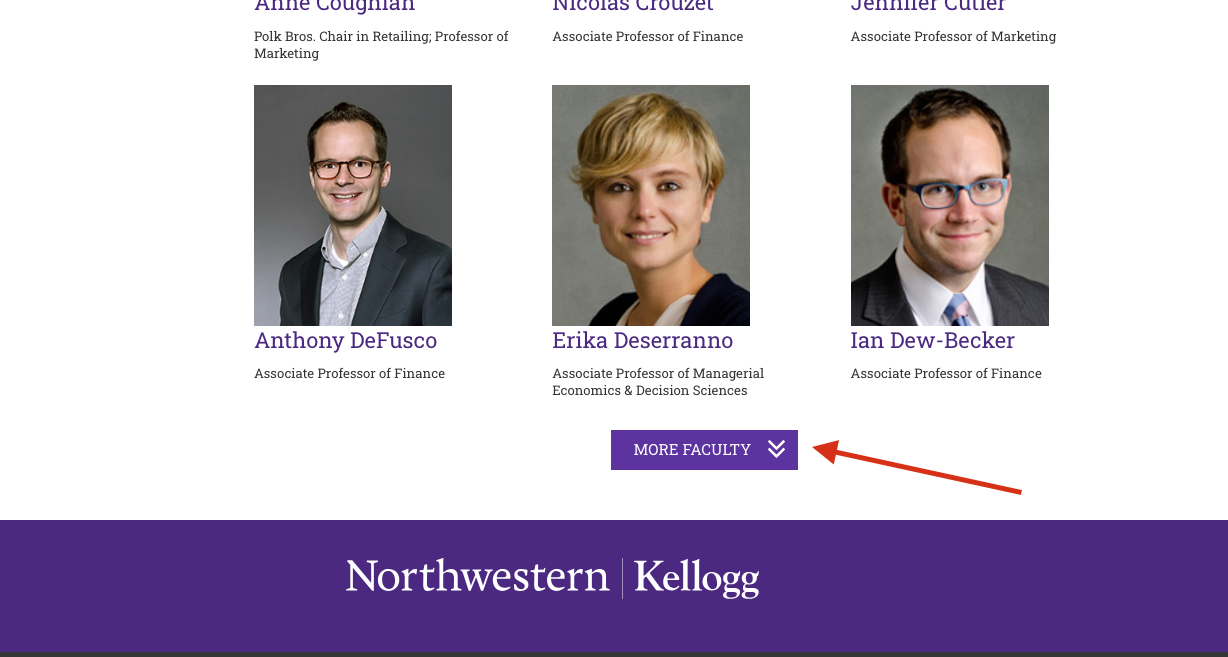

In [5]:
from IPython.display import Image
Image(filename= "image5.png", width=5000, height=5000)

In order to see all the faculty members at Kellogg, we need to click on the __MORE FACULTY__ button.  This is where _selenium_ comes in.

## <font color=blue>Step 2: Using Selenium to Control a Web Browser</font>

### Import Packages
First, we need to load the necessary libraries and file paths.  Note that _selenium_ uses a __geckodriver__ that we have stored on KLC under _/kellogg/bin/_

In [6]:
# here we make sure that we pull libraries from our conda environment
import sys
sys.path.append("~/.conda/envs/harvestFeb2020_env/bin/python")

# import library for sleep times
import time

# import BeautifulSoup
import bs4 as bs

# import selenium libraries and options
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
options = Options()
options.headless=True
#options.set_headless(headless=True) # if you select this option selenium will run without opening a browser window

Let's load the webpage we are using.

In [7]:
url = 'https://www.kellogg.northwestern.edu/faculty/faculty_directory.aspx'
print(url)

https://www.kellogg.northwestern.edu/faculty/faculty_directory.aspx


### Start a Browser Session

Next, we will create a Firefox session that directs _selenium_ to the directory that has the geckodriver and launches the website.  

In [8]:
# create a new Firefox Session
#driver = webdriver.Firefox(options=options, executable_path=r'/kellogg/bin/geckodriver')
driver = webdriver.Firefox(options=options)
driver.implicitly_wait(3)

# load the website
driver.get(url)

### Button Clicks

You'll notice that a Firefox browser window opened.  Let's tell _selenium_ to click on the __MORE FACULTY__ button to load all faculty profiles.

In [9]:
# click open the "More Faculty" button
python_button = driver.find_element_by_link_text('MORE FACULTY')
python_button.click()

We can repeat this exercise, until the full directory is loaded. Note that we are using sleep times to limit our calls to the webpage to every 3 seconds.

In [10]:
# click a few more times
while True:
    try:
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.LINK_TEXT, 'MORE FACULTY'))).click()
        time.sleep(3)
    except TimeoutException:
        break

## <font color=blue>Step 3: Use Beautiful Soup to parse the elements</font>

Now let's extract the elements with _Beautiful Soup_.

### Save Source Code
First let's save the source code from _selenium_.
 

In [11]:
# save the source code from Selenium
page_source = driver.page_source

# save to an html file
with open('faculty_pages.html', 'w') as f:
    f.write(driver.page_source)

Now let's transfer that source code to a __soup__ object that _Beautiful Soup_ can use for parsing.

In [12]:
soup = bs.BeautifulSoup(page_source, 'html.parser')
print(soup)

<html class="no-js" lang="" style="overflow-x:hidden;"><head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/><script async="" src="https://www.google.com/pagead/conversion_async.js" type="text/javascript"></script><script src="https://bam.nr-data.net/1/44c167c8fb?a=55793289&amp;v=1163.bade098&amp;to=M1RTbERWDEdVB0daDQoefG51GDFdQAFQXBABcl5WQkUNWFgBQRwrClVUQA%3D%3D&amp;rst=12729&amp;ref=https://www.kellogg.northwestern.edu/faculty/faculty_directory.aspx&amp;ap=230&amp;be=3975&amp;fe=11623&amp;dc=5179&amp;af=err,xhr,stn,ins&amp;perf=%7B%22timing%22:%7B%22of%22:1581085094515,%22n%22:0,%22f%22:3,%22dn%22:13,%22dne%22:16,%22c%22:16,%22s%22:17,%22ce%22:2411,%22rq%22:2411,%22rp%22:3677,%22rpe%22:3686,%22dl%22:3690,%22di%22:5164,%22ds%22:5176,%22de%22:5181,%22dc%22:11622,%22l%22:11622,%22le%22:11632%7D,%22navigation%22:%7B%7D%7D&amp;jsonp=NREUM.setToken" type="text/javascript"></script><script src="https://js-agent.newrelic.com/nr-1163.min.js"></script><script asy

## Identify an HTML Tag

We could try to use regular expressions on the __soup__ we created, but that could be cumbersome.  Instead, we can use the find method in _Beautiful Soup_ to identify elements in html tags. Using the tags, attributes, and values, we idenfified for the HTML table and the faculty webpages, we can save this data to objects. 

In [13]:
# find the html table with faculty profiles
faculty = soup.find('div',{'id':"bindFaculty"})
profs = faculty.findAll('h2',{'id':"facName"})

## Inspecting a _Beautiful Soup_ object

Let's look at the attributes of the faculty table

In [14]:
print(faculty.attrs)

{'id': 'bindFaculty', 'style': 'min-height:500px;'}


Let's see how many faculty profiles we found in the Kellog index.

In [15]:
print(len(profs))

199


Lets inspect the first item in the profs list.  What does it look like?  What are its associated attributes?

In [16]:
print(profs[0])
print(profs[0].attrs)

<h2 id="facName">
<a href="/faculty/directory/abdallah_tarek" target="_blank">Tarek  Abdallah</a>
</h2>
{'id': 'facName'}


We can see it contains more information than we need.  Let's extract the webpage.

In [17]:
# extract the website for this faculty member
website = profs[0].find('a', href=True)
website = website['href']
print(website)

/faculty/directory/abdallah_tarek


## <font color=red>Exercise 1</font>

<font color=red> Extract the first professor's name and title?</font> 

## Save results to a List Object

In [18]:
# save the full url for the first professor into an empty list object
website = 'https://www.kellogg.northwestern.edu' + str(website)
prof_sites = []
prof_sites.append(website)
print(prof_sites)

['https://www.kellogg.northwestern.edu/faculty/directory/abdallah_tarek']


## <font color=red>Exercise 2</font>

<font color=red>Save all of the professors' names and websites into a list object.</font>

## <font color=red>Exercise 3</font>

<font color=red>Save all of the professors' titles to a list object.</font>

## Export Results to csv File

In [19]:
# Let's save the results of this variable to a csv file
import csv
with open('faculty_pages.csv', "w") as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     for site in prof_sites:
        wr.writerow([site])

## Close the Chrome Browser

In [20]:
# end browser session
driver.quit()

## <font color=red>Answer Key</font>

In [21]:
# Exercise 1
name = profs[0].text
name = name.strip()
print(name)
titles = faculty.findAll('div',{'id':"Faculty-Guide-content"})
title1 = titles[0].text
title1 = title1.strip()
print(title1)

Tarek  Abdallah
Assistant Professor of Operations


In [22]:
# Exercise 2
prof_names = []
prof_sites = []

for i in profs:
    name = i.text
    name = name.strip()
    print(name)
    prof_names.append(name)
    
    website = i.find('a', href=True)
    website = website['href']
    website = 'https://www.kellogg.northwestern.edu' + str(website)
    print(website)
    prof_sites.append(website)

Tarek  Abdallah
https://www.kellogg.northwestern.edu/faculty/directory/abdallah_tarek
Chethana  Achar
https://www.kellogg.northwestern.edu/faculty/directory/achar_chethana
Nabil  Al-Najjar
https://www.kellogg.northwestern.edu/faculty/directory/al-najjar_nabil
Torben  Andersen
https://www.kellogg.northwestern.edu/faculty/directory/andersen_torben
Eric T. Anderson
https://www.kellogg.northwestern.edu/faculty/directory/anderson_eric_t
Nemanja  Antic
https://www.kellogg.northwestern.edu/faculty/directory/antic_nemanja
Daniel  Aobdia
https://www.kellogg.northwestern.edu/faculty/directory/aobdia_daniel
David  Austen-Smith
https://www.kellogg.northwestern.edu/faculty/directory/austen-smith_david
Scott  Baker
https://www.kellogg.northwestern.edu/faculty/directory/baker_scott_r
Sandeep  Baliga
https://www.kellogg.northwestern.edu/faculty/directory/baliga_sandeep
Chaithanya  Bandi
https://www.kellogg.northwestern.edu/faculty/directory/bandi_chaithanya
Daniel  Barron
https://www.kellogg.northwest

In [23]:
# Exercise 3
prof_titles = []
for i in titles:
    title = i.text
    title = title.strip()
    print(title)
    prof_titles.append(title)

Assistant Professor of Operations
Donald P. Jacobs Scholar
John L. and Helen Kellogg Professor of Managerial Economics & Decision Sciences
Nathan S. and Mary P. Sharp Professor of Finance; Director of the International Business & Markets Program and Research Center
Hartmarx Professor of Marketing; Director of the Center for Global Marketing Practice
Assistant Professor of Managerial Economics & Decision Sciences
Associate Professor of Accounting Information & Management
Peter G. Peterson Chair in Corporate Ethics; Professor of Managerial Economics & Decision Sciences; Director, Ford Motor Center for Global Citizenship
Associate Professor of Finance
John L. and Helen Kellogg Professor of Managerial Economics & Decision Sciences
Associate Professor of Operations
Associate Professor of Strategy
Charles E. Morrison Professor of Decision Sciences; Professor of Operations; Co-Director of MMM Program
Harold L. Stuart Professor of Finance; Director of the Guthrie Center for Real Estate Researc

## Some Cool Python Tricks

### 1.) Scroll to the Bottom of an Infinitely Loading Page
Some webpages have additional content that loads every time you scroll to the bottom.  The code below allows you to load all of this content.

In [ ]:
# Scroll to the bottom of an Infinitely Loading Page

# create a new Firefox Session
driver = webdriver.Firefox(options=options)
driver.implicitly_wait(3)

# load the website
url2 = 'https://finance.yahoo.com/quote/GOOG/'
print(url2)
driver.get(url2)
    
SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
    
#driver.quit()

### 2.) Automate a Login to a Webpage

_Selenium_ will also let you automate a login to a webpage you have permission to scrape.  The code below identifies the css selector associated with a __Login__ button

In [ ]:
# Automate a Login to a Website

# username and password
user = "name"
passw = "****"

#login to webpage
driver.get("https://www.website_here/profile/login_input.htm")
driver.wait = WebDriverWait(driver, 10)
 
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
 
username.send_keys(user)
password.send_keys(passw)
time.sleep(10)
 
driver.find_element_by_css_selector('<css_selector_here>').click()